# Colors

## Libraries

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib import gridspec

from skimage import io
from skimage import color

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## RGB Space

**RGB** stand for : _**R**ed_, _**G**reen_, _**B**lue_. 

![RGB Color Space Wikipedia](./imgs/300px-RGB_Cube_Show_lowgamma_cutout_b.png)

An RGB image is 3 a 3 dimentionnal matrix (width, height, nb_channels).

There is another channel, the _alpha_ with is used to determine transparency in images. We call this new space : __RGBa__.
This channel does not exists in several image format like _jpeg_, but exists in _png_. We should be aware of this 4th channel.

More information on this color space on [wikipedia](https://en.wikipedia.org/wiki/RGB_color_space).

This image as an alpha channel
The shape of the rgb image is : (225, 340, 4)
---
RGB  min : 0, max : 255 
Gray min : 0.016221960784313726, max : 0.957156862745098 
---
RGB  images are loaded in 3D matrix with int   values in a [0, 255] range
Gray images are loaded in 2D matrix with float values in a [0,   1] range


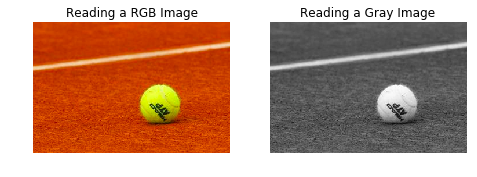

In [2]:
rgb_img  = skimage.io.imread("imgs/ball.png")               #load an image in RGB
gray_img = skimage.io.imread("imgs/ball.png", as_grey=True) #load an image in gray scale

print("This image as {}an alpha channel".format('not ' if rgb_img.shape[2] == 3 else ''))
print("The shape of the rgb image is : " + str(rgb_img.shape))
print('---')
print("RGB  min : {}, max : {} ".format(rgb_img.min(),  rgb_img.max()))
print("Gray min : {}, max : {} ".format(gray_img.min(), gray_img.max()))
print('---')
print("RGB  images are loaded in 3D matrix with int   values in a [0, 255] range")
print("Gray images are loaded in 2D matrix with float values in a [0,   1] range")


fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.set_title("Reading a RGB Image")
ax.axis('off')
ax.imshow(rgb_img)

ax = fig.add_subplot(gs[0, 1])
ax.set_title("Reading a Gray Image")
ax.axis('off')
ax.imshow(gray_img, cmap='gray')

fig.show()

Visualise the 3 channels of a RGB image


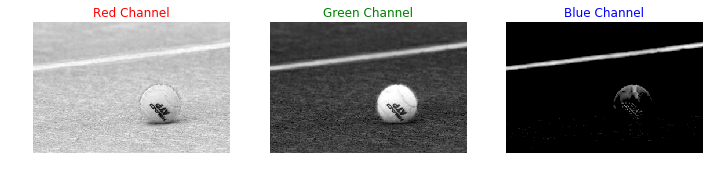

In [3]:
print("Visualise the 3 channels of a RGB image")

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.axis('off')
ax.imshow(rgb_img[:, :, 0], cmap='gray')
ax.set_title("Red Channel", color="red")

ax = fig.add_subplot(gs[0, 1])
ax.axis('off')
ax.imshow(rgb_img[:, :, 1], cmap='gray')
ax.set_title("Green Channel", color="green")

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.imshow(rgb_img[:, :, 2], cmap='gray')
ax.set_title("Blue Channel", color="blue")

fig.show()

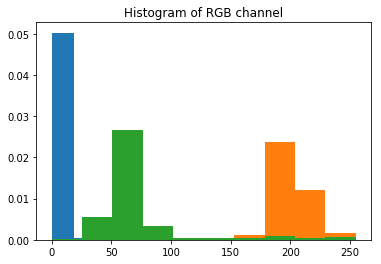

We can see the Blue channel is not so much used, and the dominant color is the Red...


In [4]:
plt.title("Histogram of RGB channel")
plt.hist(rgb_img[:, :, 2].flatten(), density=True)
plt.hist(rgb_img[:, :, 0].flatten(), density=True)
plt.hist(rgb_img[:, :, 1].flatten(), density=True)
plt.show()

print("We can see the Blue channel is not so much used, and the dominant color is the Red...")

## HSV space

__HSV__ stand for _**H**ue_, _**S**aturation_, _**V**alue_.

This space is cylindric, but be compressed in a cone like this : 

![HSV Color Space Wikipedia](./imgs/320px-HSV_color_solid_cone_chroma_gray.png)

More informations on this color space on [wikipedia](https://en.wikipedia.org/wiki/HSL_and_HSV).

In [5]:
hsv_img = color.rgb2hsv(rgb_img[:, :, :3]) #the image should not contain the alpha channel !

Visualise the 3 channels of an HSV image


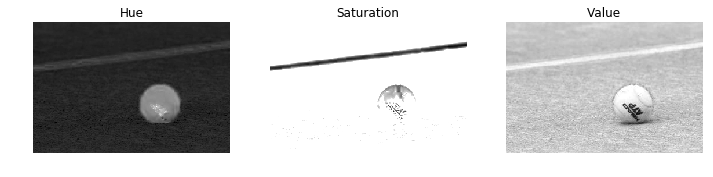

In [6]:
print("Visualise the 3 channels of an HSV image")

fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.axis('off')
ax.imshow(hsv_img[:, :, 0], cmap='gray')
ax.set_title("Hue")

ax = fig.add_subplot(gs[0, 1])
ax.axis('off')
ax.imshow(hsv_img[:, :, 1], cmap='gray')
ax.set_title("Saturation")

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.imshow(hsv_img[:, :, 2], cmap='gray')
ax.set_title("Value")

fig.show()

In [7]:
print("Range of the Hue value in this image : {}, {}".format(
    hsv_img[:, :, 0].min(), 
    hsv_img[:, :, 0].max())
)

print("Range of the Saturation value in this image : {}, {}".format(
    hsv_img[:, :, 1].min(), 
    hsv_img[:, :, 1].max())
)

print("Range of the Value value in this image : {}, {}".format(
    hsv_img[:, :, 2].min(), 
    hsv_img[:, :, 2].max())
)

Range of the Hue value in this image : 0.0, 0.3333333333333333
Range of the Saturation value in this image : 0.20762711864406788, 1.0
Range of the Value value in this image : 0.023529411764705882, 1.0


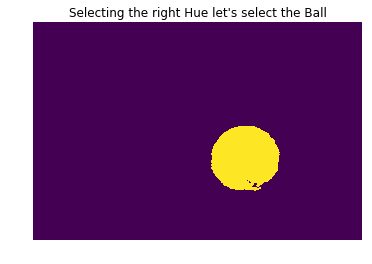

In [8]:
plt.title("Selecting the right Hue let's select the Ball")
plt.axis("off")
plt.imshow(hsv_img[:, :, 0] > .11)
plt.show()


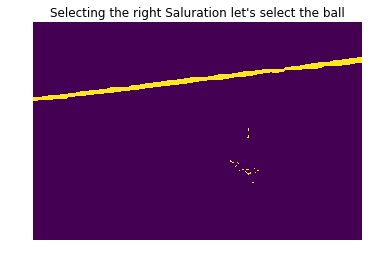

In [9]:
plt.title("Selecting the right Saluration let's select the ball")
plt.axis("off")
plt.imshow(hsv_img[:, :, 1] < .5)
plt.show()

__Exercice__ : _try to segment the line and the ball int the RGB color space._

_Do you find the HSV or the RGB space simpler to select by color ?_

In [ ]:
#TODO : try to segment the line and the ball in the RGB space

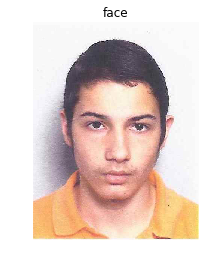

GOAL : semgent skin (put 0 on all pixels not identified as skin)


In [10]:
face_img = io.imread("imgs/face.jpeg")           #load the image
hsv_face_img = color.rgb2hsv(face_img[:, :, :3]) #convert it in rgb space

plt.title("face")
plt.axis("off")
plt.imshow(face_img)
plt.show()

print("GOAL : semgent skin (put 0 on all pixels not identified as skin)")

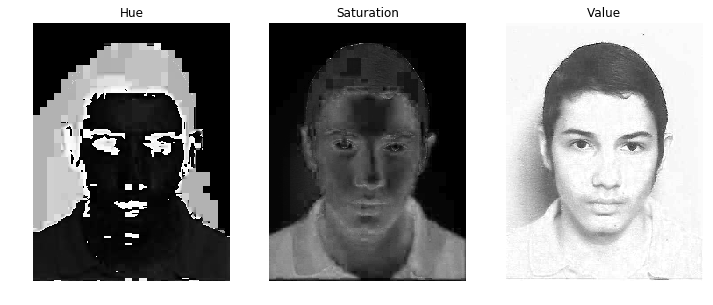

In [11]:
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(1, 3)

ax = fig.add_subplot(gs[0, 0])
ax.axis('off')
ax.imshow(hsv_face_img[:, :, 0], cmap='gray')
ax.set_title("Hue")

ax = fig.add_subplot(gs[0, 1])
ax.axis('off')
ax.imshow(hsv_face_img[:, :, 1], cmap='gray')
ax.set_title("Saturation")

ax = fig.add_subplot(gs[0, 2])
ax.axis('off')
ax.imshow(hsv_face_img[:, :, 2], cmap='gray')
ax.set_title("Value")

fig.show()

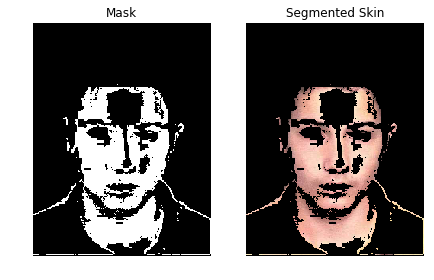

In [12]:
#compute a binary mask (set True if a pixel should be considered as skin False otherwise)
skin_pixels_mask = (hsv_face_img[:, :, 0] < .5) * (hsv_face_img[:, :, 1] < .4) * (hsv_face_img[:, :, 1] > .2)

#keep only the skin pixel and set the other at 0
face_img_copy = face_img.copy()
face_img_copy[:, :, :] = 0

for x, y in zip(*np.where(skin_pixels_mask)):
    face_img_copy[x, y, :] = face_img[x, y, :]


#display the mask and the segmented skin
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(1, 2)

ax = fig.add_subplot(gs[0, 0])
ax.axis('off')
ax.imshow(skin_pixels_mask, cmap='gray')
ax.set_title("Mask")

ax = fig.add_subplot(gs[0, 1])
ax.axis('off')
ax.imshow(face_img_copy, cmap='gray')
ax.set_title("Segmented Skin")

fig.show()

__Exercice__ : _try with other images with skin and try to vary the H, S, V or R, G, B params to segment skin and compare results_
    
_Which perform best ?_

In [ ]:
#TODO try to vary the range of RSV / RGB to select skin in image
#skin_pixels_mask = (hsv_face_img[:, :, 0] < H_MAX) * (hsv_face_img[:, :, 1] < S_MAX) * (hsv_face_img[:, :, 1] > S_MIN)

## A Little More

### Other Color Spaces

There exists a lot of other colors space used for different kind of application such as image compression.

There is a list of others color spaces supported by _skimage_:
    
- RGB
- HSV
- RGB CIE
- XYZ
- YUV
- YIQ
- YPbPr
- YCbCr
- YDbD

There is the [link](http://scikit-image.org/docs/dev/api/skimage.color.html) to the skimage doc about those color space.

### Morphological Operators

With those methods could see the some isolated pixels are detected. We want to remoe them and keep the entiere blobs.

To do so, there exists some morphological operators to remove this noise.

![some morphlogical operators and goals](./imgs/F_25_10.gif)

There is a [link](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_morphology.html) to the skimage morphological operations implemented.